# Background & Context

* Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

* Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

* As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

## Objective

* Explore and visualize the dataset.
* Build a linear regression model to predict the log of rental price
* Generate a set of insights and recommendations that will help the business.

## Data Dictionary 

1. id	Property ID
2. room_type	Type of Room in the property
3. accommodates	How many adults can this property accomodate
4. bathrooms	Number of bathrooms in the property
5. cancellation_policy	Cancellation policy of the property
6. cleaning_fee	This denotes whether the property's cleaning fee is included in the rent or not
7. instant_bookable	It indicates whether an instant booking facility is available or not
8. review_scores_rating	The review rating score of the property
9. bedrooms	Number of bedrooms in the property
10. beds	Total number of beds in the property
11. log_price	Log of the rental price of the property for a fixed period 

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed rows.
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed columns tov200
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [2]:
df = pd.read_csv("AirBNB.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 74111 rows and 11 columns.


C:\Users\robby\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


`id` is just an index for the data entry. In all likelihood, this column will not be a significant factor in  predicting the log of rental price. 


`room_type` contains a lot of type of home information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

`review_scores_rating` has NaN values


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


* There are 74111 entries
* There are 13 columns total with either a int64,object,or float64 data type.
* We are going to have to change all the 'object' Dtypes to 'category'

In [4]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

* As we can see thier are a lot of null or missing values
* Review_scores_rating has the highest with 16722 and will be the hardest to fix because we do not know if the sroce started with 0 or 100 from the get go.
* The rest look simlpe to fix

In [5]:
df[df.duplicated()].count()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [6]:
df.nunique()

id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

* No duplicate data
*  log_price has the second hidgest unique value count
* The most important ones are going to be the 'category' Dtypes after we change them from objects

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.0,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
accommodates,74108.0,3.155125e+00,2.153603e+00,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73908.0,1.235272e+00,5.820540e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.0,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74019.0,1.265797e+00,8.521487e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01
log_price,74111.0,4.782069e+00,7.173938e-01,0.0,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00


* five point summery
* accommodates min is 1.0 to 16 max
* bathrooms min is 0 to 8 max
* review_scores_rating min is 20 to 100 max


#### looking at value counts for non-numeric features

In [8]:
num_to_display = 10  
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Entire home/apt    41308
Private room       30635
Shared room         2163
NaN                    5
Name: room_type, dtype: int64



strict      32500
flexible    22543
moderate    19060
NaN             8
Name: cancellation_policy, dtype: int64



True     54399
False    19708
NaN          4
Name: cleaning_fee, dtype: int64



f    54660
t    19451
Name: instant_bookable, dtype: int64





##### Observations

* Most of the home for rent are Entire home/apt at 41308 
* About 32500 have a very strict cancellation policy
* About 54399 have a cleaning fee
* about 19451 have a instant bookalb option

# Processing Columns

##### Checking DataTypes

In [9]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], dtype='object')

In [10]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    74111 non-null  int64   
 1   room_type             74106 non-null  category
 2   accommodates          74108 non-null  float64 
 3   bathrooms             73908 non-null  float64 
 4   cancellation_policy   74103 non-null  category
 5   cleaning_fee          74107 non-null  category
 6   instant_bookable      74111 non-null  category
 7   review_scores_rating  57389 non-null  float64 
 8   bedrooms              74019 non-null  float64 
 9   beds                  73980 non-null  float64 
 10  log_price             74111 non-null  float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 4.2 MB


* Converted all object datatypes to Category

#### Missing Values

In [12]:
df = df.replace('?', np.nan)

* Replaced all missing values with NaN

In [13]:
df.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
59601,13567393,Entire home/apt,3.0,2.0,flexible,False,f,NaN,2.0,1.0,4.248495
43446,17640554,Entire home/apt,4.0,1.0,strict,True,t,88.0,0.0,1.0,4.499810
7997,600295,Entire home/apt,4.0,1.0,strict,True,f,100.0,2.0,2.0,5.298317
17414,6079197,Private room,1.0,1.0,moderate,True,f,100.0,1.0,1.0,3.433987
3957,1180537,Entire home/apt,8.0,2.0,strict,True,f,99.0,4.0,4.0,5.988961
6033,19504042,Entire home/apt,2.0,1.5,moderate,True,f,100.0,1.0,1.0,4.787492
29784,4802374,Private room,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.442651
19117,349841,Entire home/apt,3.0,1.0,flexible,True,f,NaN,1.0,1.0,5.141664
23723,6741968,Private room,2.0,1.0,flexible,True,t,NaN,1.0,1.0,4.077537
35746,6115291,Private room,2.0,2.0,moderate,True,f,97.0,1.0,1.0,4.442651


In [14]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].min())

In [15]:
series = pd.isnull(df["review_scores_rating"]) 

In [16]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].min())

In [17]:
df[series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price


* Replaced all NaN values with the min for review_scores_rating
* My thought process is that if they are missing or have no reviews then the min will not skew the data to 0 since thier are 16722 missing values

In [18]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [19]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [20]:
df['beds'] = df['beds'].fillna(df['beds'].median())

In [21]:
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median())

In [22]:
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median())

In [23]:
df.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
41874,4395384,Private room,2.0,1.0,strict,False,f,100.0,1.0,1.0,4.007333
2342,2105487,Entire home/apt,4.0,2.0,strict,True,f,86.0,2.0,2.0,5.241747
21809,9040214,Entire home/apt,8.0,4.0,moderate,True,f,100.0,4.0,5.0,5.521461
37956,7559867,Entire home/apt,6.0,1.0,flexible,True,f,92.0,3.0,3.0,5.298317
53994,10469455,Private room,2.0,1.0,strict,False,f,90.0,4.0,4.0,3.850148
10647,8054651,Private room,1.0,1.5,flexible,False,f,100.0,1.0,1.0,3.912023
66134,19252113,Private room,1.0,1.0,moderate,True,f,97.0,1.0,1.0,4.553877
15207,14821542,Entire home/apt,4.0,1.0,flexible,False,f,20.0,2.0,2.0,5.298317
62184,12930677,Entire home/apt,3.0,1.0,moderate,True,t,84.0,1.0,2.0,4.787492
35808,9391509,Entire home/apt,4.0,2.0,strict,True,f,93.0,2.0,2.0,5.298317


* Replaced all NaN values with the median for columes accommodates,bathrooms,	bedrooms,beds.

#### Replacing categorical variables missing values 

In [24]:
bool_series = pd.isnull(df["room_type"]) 

In [25]:
df[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,457555,NaN,1.0,1.0,flexible,False,f,20.0,1.0,1.0,5.521461
167,6374167,NaN,5.0,1.0,strict,True,f,97.0,2.0,3.0,5.575949
195,19981334,NaN,2.0,1.0,moderate,True,f,99.0,1.0,1.0,3.555348
255,455801,NaN,4.0,1.0,moderate,True,f,91.0,1.0,2.0,4.418841
552,4874722,NaN,1.0,2.5,strict,True,t,100.0,1.0,1.0,4.488636


In [26]:
df["room_type"].fillna("Entire home/apt", inplace = True)

In [27]:
df[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,457555,Entire home/apt,1.0,1.0,flexible,False,f,20.0,1.0,1.0,5.521461
167,6374167,Entire home/apt,5.0,1.0,strict,True,f,97.0,2.0,3.0,5.575949
195,19981334,Entire home/apt,2.0,1.0,moderate,True,f,99.0,1.0,1.0,3.555348
255,455801,Entire home/apt,4.0,1.0,moderate,True,f,91.0,1.0,2.0,4.418841
552,4874722,Entire home/apt,1.0,2.5,strict,True,t,100.0,1.0,1.0,4.488636


* Replaced the 5 NaN values with Entire home/apt because they have the highest count in room_type

In [28]:
bool_series = pd.isnull(df["cancellation_policy"]) 

In [29]:
df[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
205,2754149,Private room,2.0,1.0,NaN,NaN,t,96.0,1.0,1.0,4.584967
209,14783267,Entire home/apt,2.0,1.0,NaN,NaN,f,93.0,1.0,1.0,4.787492
232,12265833,Entire home/apt,2.0,1.0,NaN,NaN,f,100.0,1.0,1.0,5.298317
348,18388570,Entire home/apt,2.0,1.0,NaN,False,f,20.0,0.0,1.0,4.605170
349,20620600,Private room,2.0,1.0,NaN,True,f,20.0,1.0,1.0,5.220356
399,2484207,Entire home/apt,2.0,1.0,NaN,NaN,t,100.0,1.0,1.0,5.703782
454,7939196,Entire home/apt,2.0,1.0,NaN,True,f,82.0,1.0,3.0,4.867534
574,169306,Entire home/apt,3.0,1.0,NaN,False,f,20.0,0.0,2.0,4.317488


In [30]:
df["cancellation_policy"].fillna("strict", inplace = True)

In [31]:
df[bool_series] 

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
205,2754149,Private room,2.0,1.0,strict,NaN,t,96.0,1.0,1.0,4.584967
209,14783267,Entire home/apt,2.0,1.0,strict,NaN,f,93.0,1.0,1.0,4.787492
232,12265833,Entire home/apt,2.0,1.0,strict,NaN,f,100.0,1.0,1.0,5.298317
348,18388570,Entire home/apt,2.0,1.0,strict,False,f,20.0,0.0,1.0,4.605170
349,20620600,Private room,2.0,1.0,strict,True,f,20.0,1.0,1.0,5.220356
399,2484207,Entire home/apt,2.0,1.0,strict,NaN,t,100.0,1.0,1.0,5.703782
454,7939196,Entire home/apt,2.0,1.0,strict,True,f,82.0,1.0,3.0,4.867534
574,169306,Entire home/apt,3.0,1.0,strict,False,f,20.0,0.0,2.0,4.317488


* Replaced the 8 missing values with strict since they have the highest count in cancellation_policy

In [32]:
df['cleaning_fee'].value_counts()

True     54399
False    19708
Name: cleaning_fee, dtype: int64

In [33]:
df.cleaning_fee = df.cleaning_fee.fillna(True)

* Replaced 4 missing values in bool values with True 

In [34]:
df['instant_bookable'] = df['instant_bookable'].map(
                   {'t':True ,'f':False})

* Replaced all t with True and f with False

In [35]:
df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

### EDA

## Univariate analysis

In [36]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [37]:

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


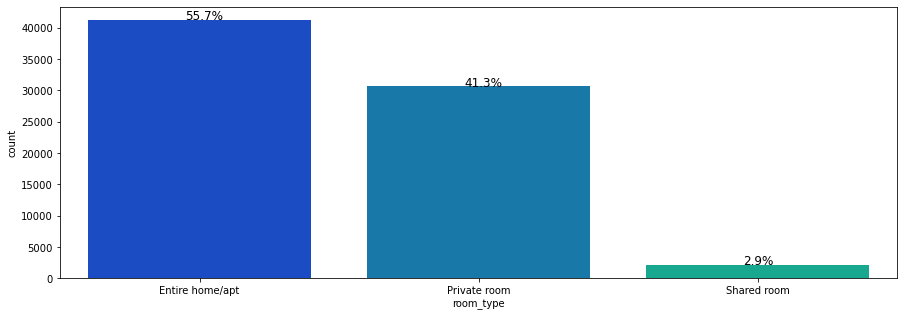

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["room_type"],palette='winter')
perc_on_bar(ax,df["room_type"])

* 55.7% are entire home/apt and 2.9% are shared room

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


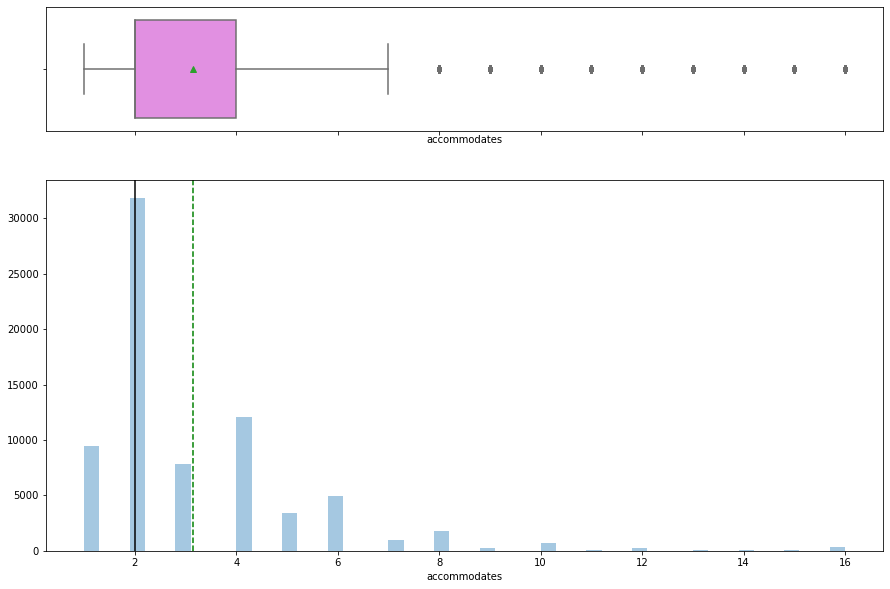

In [39]:
histogram_boxplot(df['accommodates'])

* The max accommodations is 16 with an averge of 3

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


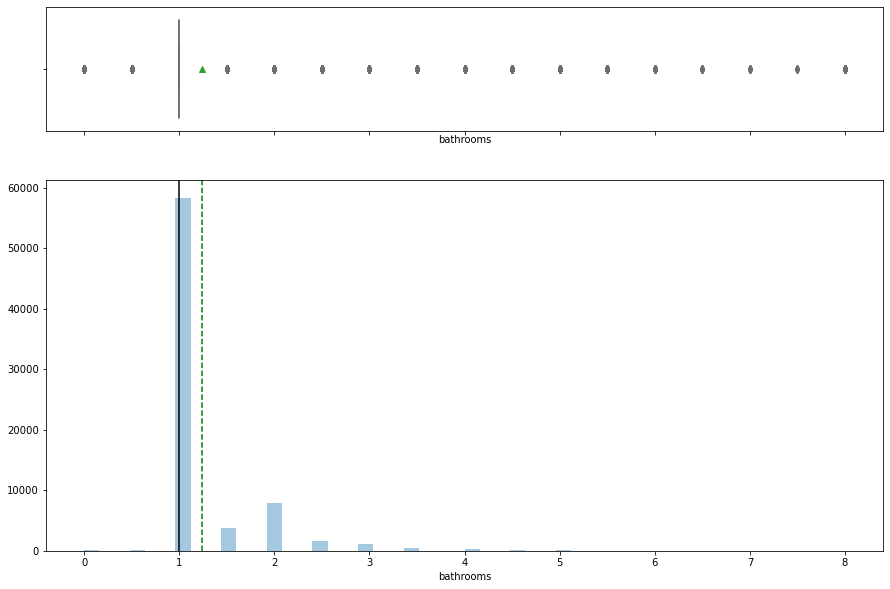

In [40]:
histogram_boxplot(df['bathrooms'])

* The max bathrooms is 5 with an averge of 1.2

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


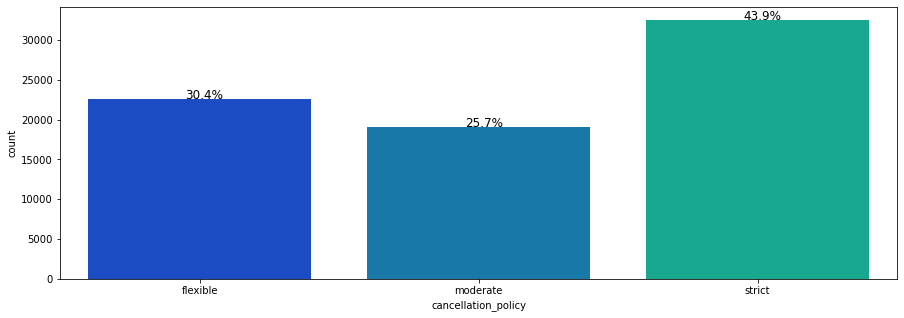

In [41]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["cancellation_policy"],palette='winter')
perc_on_bar(ax,df["cancellation_policy"])

* About 30.4 % of the cancellation policy is flexible and 44% is strict

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


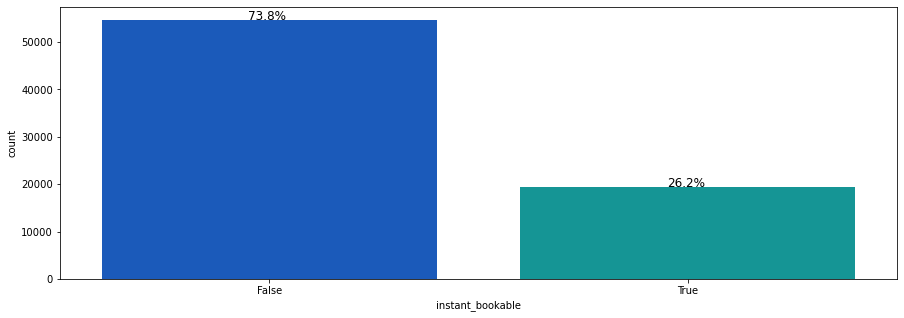

In [42]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["instant_bookable"],palette='winter')
perc_on_bar(ax,df["instant_bookable"])

* About 78.3 percent of the rentals are not instant bookable

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


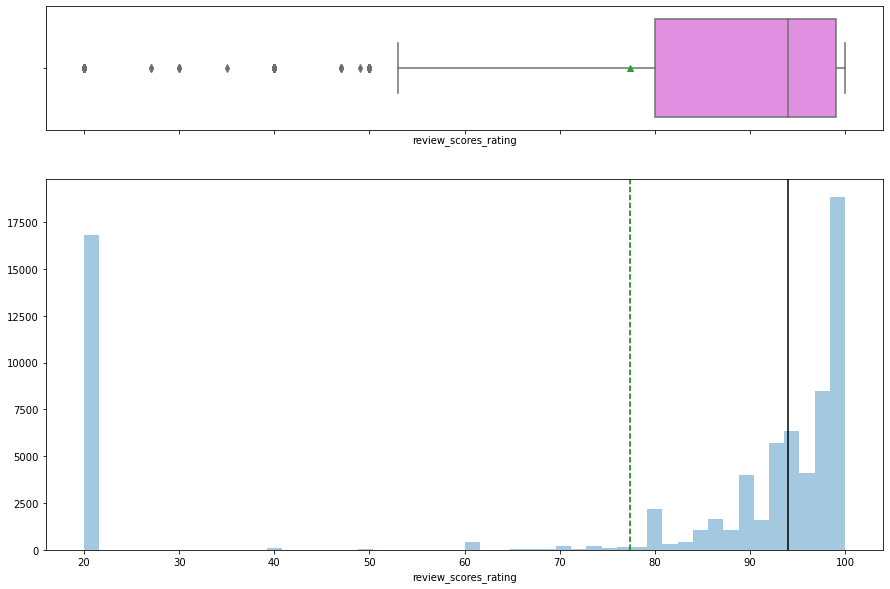

In [43]:
histogram_boxplot(df['review_scores_rating'])

* All the missing values we set to 20 the averge is 78%

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


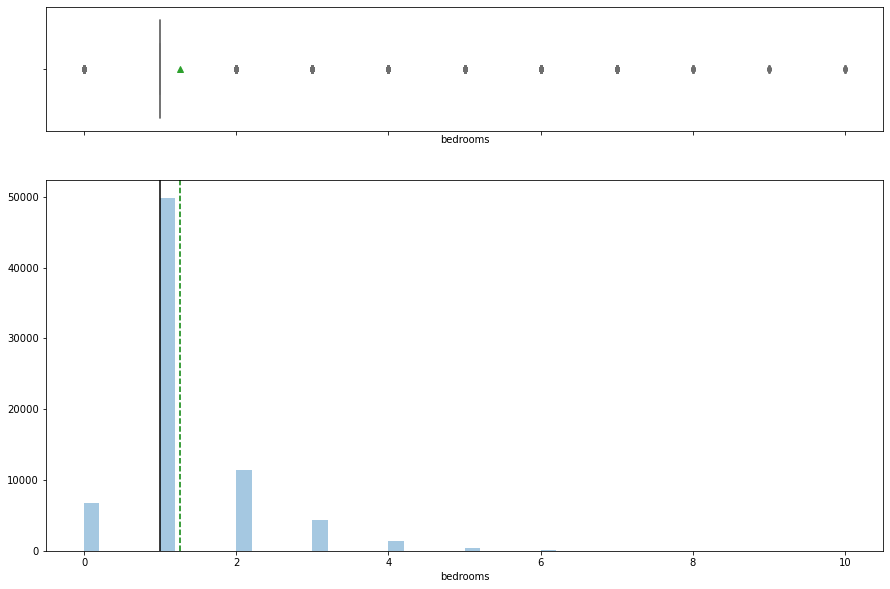

In [44]:
histogram_boxplot(df['bedrooms'])

* The averge bathrooms in a rental is 1.6
* Alot of outliers

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


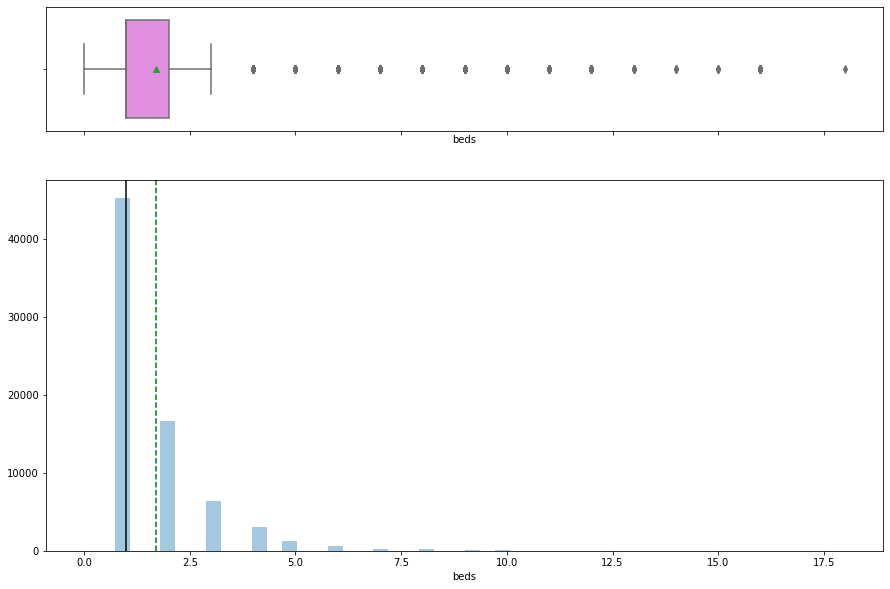

In [45]:
histogram_boxplot(df['beds'])

* The averge beds in a rental is 1.5
* Alot of outliers

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


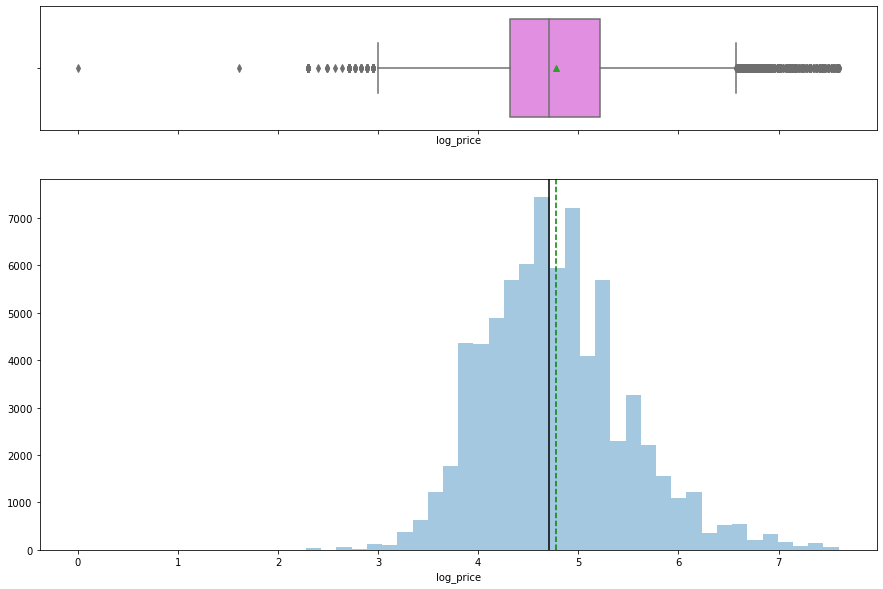

In [46]:
histogram_boxplot(df['log_price'])

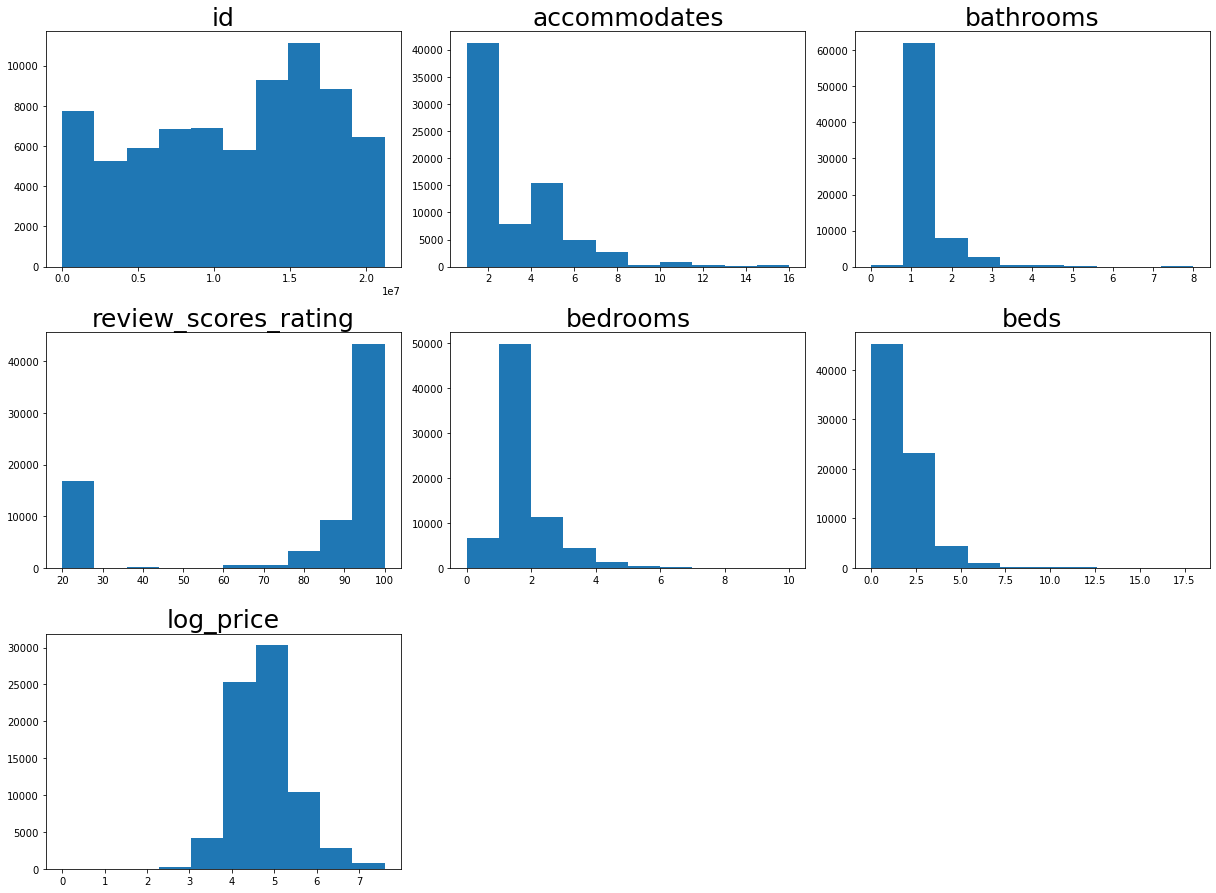

In [47]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

## Bivariate analysis

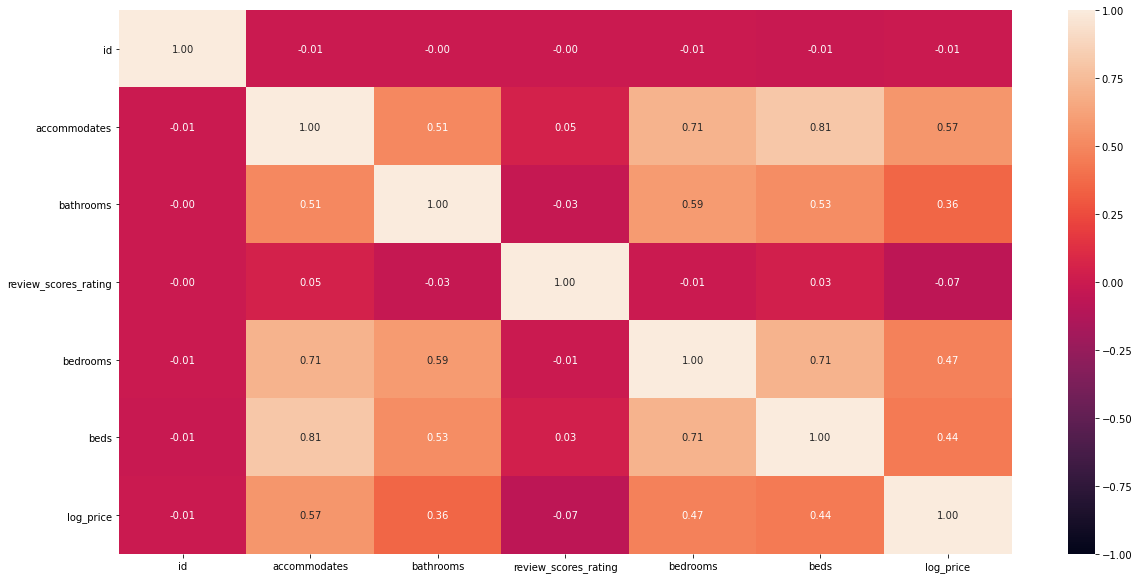

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

* As we can see there big Correlation between beds and accommodates, which makes sense because they need a bed to sleep.
* Thier is also a Correlation between bedroom and beds.

In [49]:
df.corr(method ='pearson') 

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
id,1.000000,-0.005755,-0.004058,-0.004263,-0.007578,-0.008876,-0.007178
accommodates,-0.005755,1.000000,0.505506,0.049729,0.709230,0.810231,0.567572
bathrooms,-0.004058,0.505506,1.000000,-0.025190,0.589783,0.525699,0.355174
review_scores_rating,-0.004263,0.049729,-0.025190,1.000000,-0.007647,0.034815,-0.066501
bedrooms,-0.007578,0.709230,0.589783,-0.007647,1.000000,0.709186,0.473028
beds,-0.008876,0.810231,0.525699,0.034815,0.709186,1.000000,0.441953
log_price,-0.007178,0.567572,0.355174,-0.066501,0.473028,0.441953,1.000000


C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


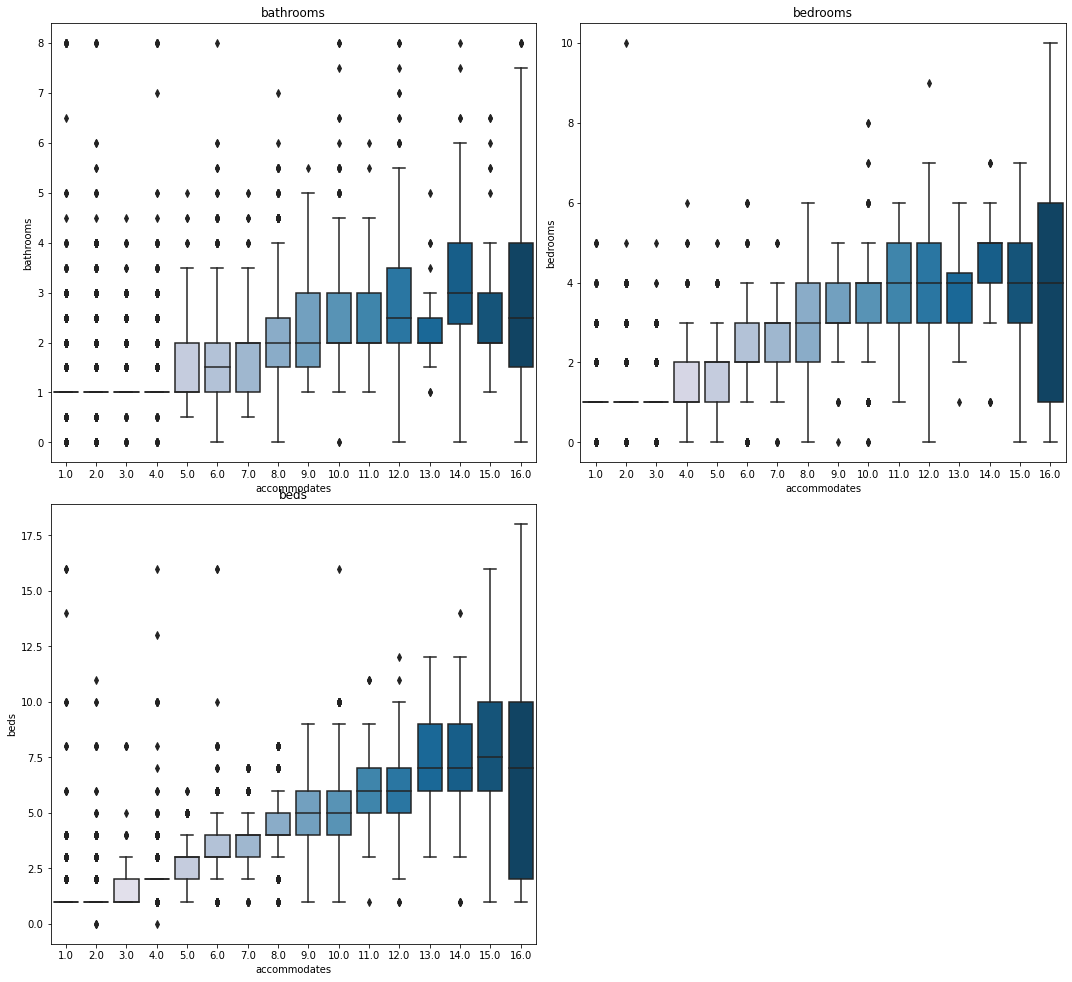

In [50]:
cols = df[['bathrooms','bedrooms','beds']].columns.tolist()
plt.figure(figsize=(15,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["accommodates"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* There are lower outliers in log_price, review_scores_rating,
* There are higher outliers in beds,bedrooms,bathrooms, accommodates

In [51]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['accommodates'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['accommodates'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

accommodates      1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  10.0  \
room_type                                                                     
Entire home/apt   739  12019  5808  10462  3206  4720  907  1739  262   663   
Private room     7551  19194  1879   1480   216   196   30    37    4    18   
Shared room      1144    643   106    124    22    52    9    19    4    20   
All              9434  31856  7793  12066  3444  4968  946  1795  270   701   

accommodates     11.0  12.0  13.0  14.0  15.0  16.0    All  
room_type                                                   
Entire home/apt    77   258    35    97    49   272  41313  
Private room        1     4     1     6     4    14  30635  
Shared room         1     2     0     1     1    15   2163  
All                79   264    36   104    54   301  74111  
------------------------------------------------------------------------------------------------------------------------


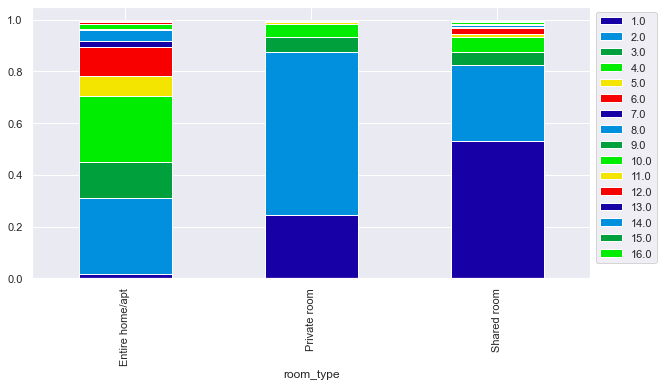

In [52]:
stacked_plot(df['room_type'])

accommodates          1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  \
cancellation_policy                                                         
flexible             4395  10950  2083   2940   658   905  138   262   33   
moderate             1967   8903  2211   3216   865  1102  195   345   50   
strict               3072  12003  3499   5910  1921  2961  613  1188  187   
All                  9434  31856  7793  12066  3444  4968  946  1795  270   

accommodates         10.0  11.0  12.0  13.0  14.0  15.0  16.0    All  
cancellation_policy                                                   
flexible               93     4    24     2    13     6    37  22543  
moderate               97     8    37     8    18     4    34  19060  
strict                511    67   203    26    73    44   230  32508  
All                   701    79   264    36   104    54   301  74111  
---------------------------------------------------------------------------------------------------------------

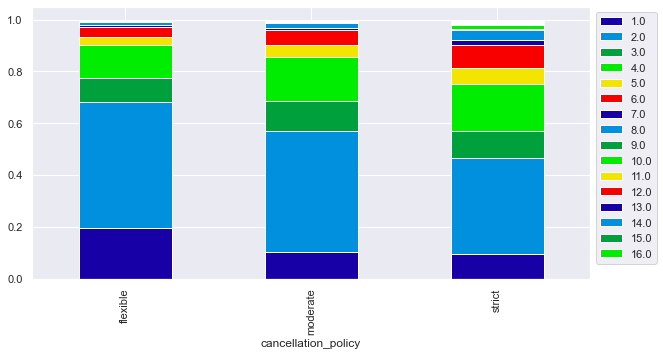

In [53]:
stacked_plot(df['cancellation_policy'])

### Outlier detection using IQR

##### Treatment for log_price

In [54]:
np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)

def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


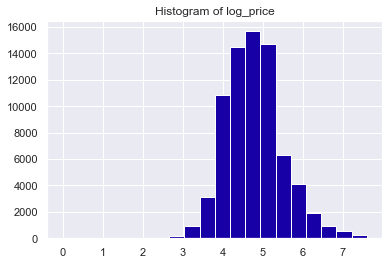

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


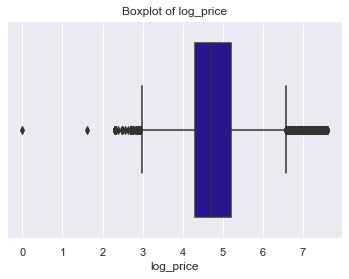

In [55]:
plt.hist(df['log_price'], 20)
plt.title('Histogram of log_price')
plt.show()

sns.boxplot(df['log_price'])
plt.title('Boxplot of log_price')
plt.show()

In [56]:
quartiles = np.quantile(df['log_price'][df['log_price'].notnull()], [.25, .75])
log_price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {log_price_4iqr}')
outlier_log_price = df.loc[np.abs(df['log_price'] - df['log_price'].median()) > log_price_4iqr, 'log_price']
outlier_log_price

Q1 = 4.317488114, Q3 = 5.220355825, 4*IQR = 3.611470844000003


11632    0.0
Name: log_price, dtype: float64

In [57]:
df.drop(outlier_log_price.index, axis=0, inplace=True)

##### Treatment for review_scores_rating

In [58]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


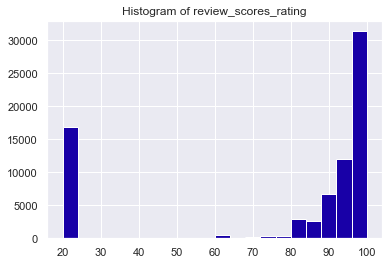

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


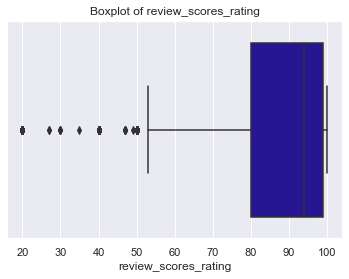

In [59]:
plt.hist(df['review_scores_rating'], 20)
plt.title('Histogram of review_scores_rating')
plt.show()

sns.boxplot(df['review_scores_rating'])
plt.title('Boxplot of review_scores_rating')
plt.show()

In [60]:
quartiles = np.quantile(df['review_scores_rating'][df['review_scores_rating'].notnull()], [.25, .75])
review_scores_rating_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {review_scores_rating_4iqr}')
outlier_review_scores_rating = df.loc[np.abs(df['review_scores_rating'] - df['review_scores_rating'].median()) > review_scores_rating_4iqr, 'review_scores_rating']
outlier_review_scores_rating

Q1 = 80.0, Q3 = 99.0, 4*IQR = 76.0


Series([], Name: review_scores_rating, dtype: float64)

In [61]:
df.drop(outlier_review_scores_rating.index, axis=0, inplace=True)

##### Treatment for accommodates

In [62]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


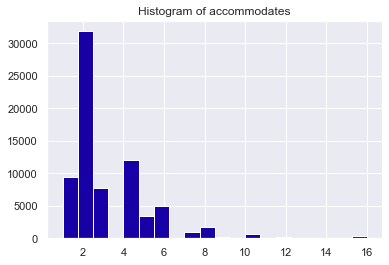

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


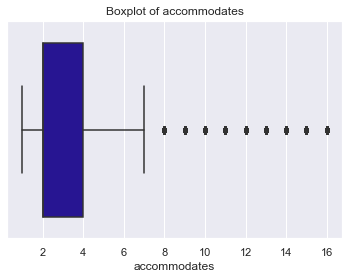

In [63]:
plt.hist(df['accommodates'], 20)
plt.title('Histogram of accommodates')
plt.show()

sns.boxplot(df['accommodates'])
plt.title('Boxplot of accommodates')
plt.show()

In [64]:
quartiles = np.quantile(df['accommodates'][df['accommodates'].notnull()], [.25, .75])
accommodates_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {accommodates_4iqr}')
outlier_accommodates = df.loc[np.abs(df['accommodates'] - df['accommodates'].median()) > accommodates_4iqr, 'accommodates']
outlier_accommodates

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


306      16.0
457      16.0
482      11.0
569      16.0
642      12.0
         ... 
73669    12.0
73695    12.0
73957    14.0
73980    15.0
74081    16.0
Name: accommodates, Length: 838, dtype: float64

In [65]:
df.drop(outlier_accommodates.index, axis=0, inplace=True)

##### Treatment for beds

In [66]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


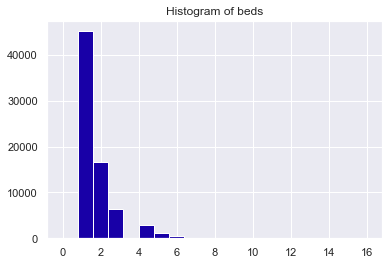

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


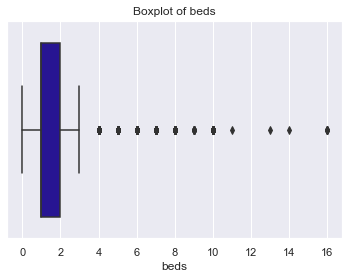

In [67]:
plt.hist(df['beds'], 20)
plt.title('Histogram of beds')
plt.show()

sns.boxplot(df['beds'])
plt.title('Boxplot of beds')
plt.show()

In [68]:
quartiles = np.quantile(df['beds'][df['beds'].notnull()], [.25, .75])
beds_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {beds_4iqr}')
outlier_beds = df.loc[np.abs(df['beds'] - df['beds'].median()) > beds_4iqr, 'beds']
outlier_beds

Q1 = 1.0, Q3 = 2.0, 4*IQR = 4.0


42        7.0
81        6.0
547       6.0
756       8.0
798       6.0
         ... 
73768     6.0
73804     6.0
73842     7.0
73899     6.0
74102    10.0
Name: beds, Length: 781, dtype: float64

In [69]:
df.drop(outlier_beds.index, axis=0, inplace=True)

* There are lower outliers in log_price, review_scores_rating,
* There are higher outliers in beds,bedrooms,bathrooms, accommodates
* Using the IQR we treated the outliers

## Distributions

<AxesSubplot:xlabel='log_price', ylabel='Count'>

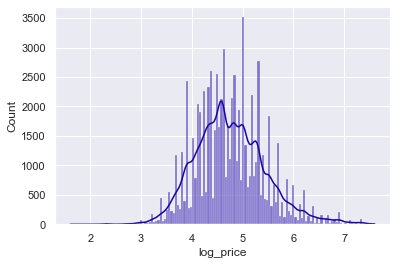

In [70]:
sns.histplot(df["log_price"], kde=True)

### Correlation between numeric Variables

<AxesSubplot:>

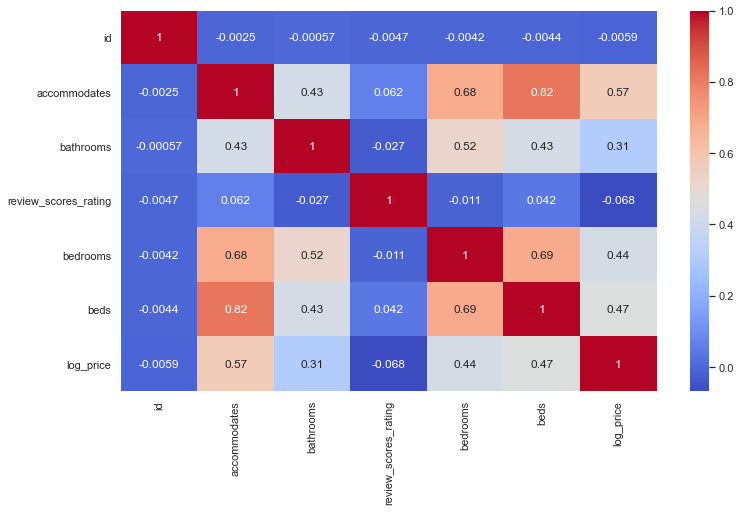

In [71]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

* As we can see there big Correlation between beds and accommodates, which makes sense because they need a bed to sleep.
* Thier is also a Correlation between bedroom and beds.

# Linear Model Building

### Define dependent variable

In [72]:
ind_vars = df.drop(["accommodates", "log_price"], axis=1)
dep_var = df[["log_price"]] 

print(ind_vars.head())
print(dep_var.head())

         id        room_type  bathrooms cancellation_policy cleaning_fee  \
0   6901257  Entire home/apt        1.0              strict         True   
1   6304928  Entire home/apt        1.0              strict         True   
2   7919400  Entire home/apt        1.0            moderate         True   
3  13418779  Entire home/apt        1.0            flexible         True   
4   3808709  Entire home/apt        1.0            moderate         True   

  instant_bookable  review_scores_rating  bedrooms  beds  
0            False                 100.0       1.0   1.0  
1             True                  93.0       3.0   3.0  
2             True                  92.0       1.0   3.0  
3            False                  20.0       2.0   2.0  
4             True                  40.0       0.0   1.0  
   log_price
0   5.010635
1   5.129899
2   4.976734
3   6.620073
4   4.744932


### Creating dummy variables

In [73]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,id,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,6901257,1.0,100.0,1.0,1.0,0,0,0,1,1,0
1,6304928,1.0,93.0,3.0,3.0,0,0,0,1,1,1
2,7919400,1.0,92.0,1.0,3.0,0,0,1,0,1,1
3,13418779,1.0,20.0,2.0,2.0,0,0,0,0,1,0
4,3808709,1.0,40.0,0.0,1.0,0,0,1,0,1,1


### Split the data into train and test

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)


In [75]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 50743
Number of rows in train data = 21748


### Fitting a linear model

In [76]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

#### coefficients and intercept of the model

In [77]:
coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=x_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
coef_df

,Coefficients
id,-5.058515e-11
bathrooms,1.572243e-01
review_scores_rating,-2.284615e-03
bedrooms,1.840101e-01
beds,5.669303e-02
room_type_Private room,-6.917522e-01
room_type_Shared room,-1.167033e+00
cancellation_policy_moderate,-1.467851e-02
cancellation_policy_strict,2.585779e-02
cleaning_fee_True,-3.240242e-02


* bathrooms come out to be very signifcant, as expected. There are two variable -review_scores_rating and room_type_Private room. As these two increase, the total value of the rental decreases, as visible in the negative coefficient sign.

** The model performance on training data. **

In [78]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = np.exp(model.predict(inp))
    y_act = np.exp(out.values)

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [79]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

        RMSE        MAE       MAPE       R^2  Adjusted R^2
0  127.70605  61.123603  40.317897  0.320275      0.320128


In [80]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

         RMSE        MAE       MAPE      R^2  Adjusted R^2
0  125.201455  60.265486  39.881862  0.34693        0.3466


* As our MEA has a high score  means we have bad proformance on our model
* Since we have less samples it is harder to reconstruct the error distribution using RMSE which is the reason it is so high in our case.
* Our R^2 is low and that is because our dataset or the data points are distributed with low variance and should be closer to 1 
* Adjusted R-squared is low becuse we dont have many features and by that i mean the effective features to train our model.
* I do think we need more features and better treatment of the ouliers to improve our score. 

### Forward Feature Selection

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg,k_features = x_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-05-26 20:38:13] Features: 1/11 -- score: 0.28365405922668196[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-05-26 20:38:13] Features: 2/11 -- score: 0.38643266290376593[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-05-26 20:38:14] Features: 3/11 -- score: 0.45630911159279036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [82]:
reg = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(reg, k_features = 11, forward=True,
           floating=False, scoring='r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-05-26 20:38:15] Features: 1/11 -- score: 0.28365405922668196[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-05-26 20:38:16] Features: 2/11 -- score: 0.38643266290376593[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-05-26 20:38:16] Features: 3/11 -- score: 0.45630911159279036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [83]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [84]:
x_train.columns[feat_cols]

Index(['id', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [85]:
x_train2 = x_train[x_train.columns[feat_cols]]

In [86]:
x_test.columns

Index(['id', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [87]:
#Creating new x_test with the same 11 variables that we selected for x_train
x_test2 = x_test[x_train2.columns]

In [88]:
#Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_.flatten()), \
                       index=x_train2.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model2, x_train2, y_train))

# model performance on test set
print('\n\nTest Performance\n')
print(model_perf(lin_reg_model2, x_test2, y_test))

                              Coefficients
id                           -5.058515e-11
bathrooms                     1.572243e-01
review_scores_rating         -2.284615e-03
bedrooms                      1.840101e-01
beds                          5.669303e-02
room_type_Private room       -6.917522e-01
room_type_Shared room        -1.167033e+00
cancellation_policy_moderate -1.467851e-02
cancellation_policy_strict    2.585779e-02
cleaning_fee_True            -3.240242e-02
instant_bookable_True        -5.234383e-02
Intercept                     4.791142e+00


Training Performance

        RMSE        MAE       MAPE       R^2  Adjusted R^2
0  127.70605  61.123603  40.317897  0.320275      0.320128


Test Performance

         RMSE        MAE       MAPE      R^2  Adjusted R^2
0  125.201455  60.265486  39.881862  0.34693        0.3466


### Analysing predictions where we were way off the mark

In [89]:
# Extracting the rows from original data frame df where indexes are same as the training data
original_df = df[df.index.isin(x_train2.index.values)].copy()

# Extracting predicted values and residuals from the final model
fitted_values = lin_reg_model2.predict(x_train2)
residuals = fitted_values - y_train

# Add new columns for predicted values
original_df["Predicted log_price"] = fitted_values
original_df["Predicted accommodates"] = np.exp(fitted_values)
original_df["residuals"] = residuals
original_df["Abs_residuals"] = np.exp(residuals)
original_df["Difference log_price"] = np.abs(
    original_df["accommodates"] - original_df["Predicted accommodates"]
)

# Let us look at the top 50 predictions where our model made highest extimation errors (on train data)
original_df.sort_values(by=["Difference log_price"], ascending=False).head(50)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,Predicted log_price,Predicted accommodates,residuals,Abs_residuals,Difference log_price
26621,15257293,Entire home/apt,4.0,2.0,strict,True,False,92.0,2.0,2.0,6.204558,6.937793,1030.493892,-0.835062,0.433848,1026.493892
46475,12591975,Entire home/apt,2.0,1.0,strict,False,False,100.0,0.0,1.0,4.094345,6.890384,982.778966,0.707474,2.028860,980.778966
54102,15769333,Entire home/apt,6.0,2.0,strict,True,True,92.0,2.0,2.0,5.517453,6.833121,928.082581,-0.200327,0.818463,922.082581
3052,7651400,Private room,5.0,1.0,strict,True,False,91.0,1.0,2.0,5.541264,6.780460,880.473283,-1.202085,0.300567,875.473283
67431,19117185,Private room,3.0,1.5,strict,True,True,98.0,1.0,1.0,4.595120,6.754143,857.604622,-0.302938,0.738645,854.604622
70100,128036,Shared room,1.0,1.0,strict,True,False,80.0,1.0,1.0,2.995732,6.734747,841.130936,0.836984,2.309391,840.130936
12091,12760402,Private room,2.0,2.0,moderate,True,False,100.0,1.0,2.0,3.663562,6.649535,772.425092,0.771485,2.162976,770.425092
23518,782063,Private room,3.0,1.5,strict,True,True,94.0,1.0,1.0,4.234107,6.649722,772.569275,0.068141,1.070516,769.569275
27693,16052733,Private room,2.0,1.0,strict,True,False,100.0,1.0,3.0,5.209486,6.647775,771.066567,-0.834601,0.434048,769.066567
45888,13345384,Entire home/apt,6.0,1.0,flexible,False,True,20.0,2.0,3.0,6.040255,6.649075,772.069561,-0.652500,0.520742,766.069561


# Observations and Conclusions


1. With our linear regression model we have been able to capture ~32% variation in our data.

2. The model indicates that the most significant predictors of price of used cars are - 
* bathrooms	                    1.572243e-01
* review_scores_rating	       -2.284615e-03
* bedrooms	                    1.840101e-01
* beds	                        5.669303e-02
* room_type_Private room	   -6.917522e-01
* room_type_Shared room	       -1.167033e+00
* cancellation_policy_moderate -1.467851e-02
* cancellation_policy_strict    2.585779e-02
* cleaning_fee_True	           -3.240242e-02
* instant_bookable_True	       -5.234383e-02
* Intercept	                    4.791142e+00


* The more  bedrooms and beds the rental has the higher the price.
* If it is instant bookable the higher the price
* If the rental has bad reviews then lower the rental price.